In [45]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [46]:
pip install pydotplus

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.


In [47]:
import keras
import numpy as np  
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils  # 用來後續將 label 標籤轉為 one-hot-encoding  
from matplotlib import pyplot as plt
import pydotplus
import graphviz
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import pandas as pd
import numpy as np
import csv
from sklearn.metrics import precision_score, recall_score, f1_score
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error

In [48]:
def WorkClassConvert(wClass):
    WorkClass=["Private","Self-emp-not-inc","Self-emp-inc","Federal-gov","Local-gov","State-gov","Without-pay","Never-worked"]
    isHarmony=False
    returnArray=[]
    for w in WorkClass:
        if wClass.strip()==w:
            returnArray.append(1)
            isHarmony=True
        else:
            returnArray.append(0)
    return returnArray,isHarmony

In [49]:
def MaritalStatusConvert(status):
    MaritalStatus=["Married-civ-spouse","Divorced","Never-married","Separated","Widowed","Married-spouse-absent","Married-AF-spouse"]
    isHarmony=False
    returnArray=[]
    for m in MaritalStatus:
        if status.strip()==m:
            returnArray.append(1)
            isHarmony=True
        else:
            returnArray.append(0)
    return returnArray,isHarmony

In [50]:
def OccupationConvert(o):
    Occupation=["Tech-support","Craft-repair","Other-service","Sales","Exec-managerial","Prof-specialty","Handlers-cleaners","Machine-op-inspct","Adm-clerical","Farming-fishing","Transport-moving","Priv-house-serv","Protective-serv","Armed-Forces"]
    isHarmony=False
    returnArray=[]
    for occ in Occupation:
        if o.strip()==occ:
            returnArray.append(1)
            isHarmony=True
        else:
            returnArray.append(0)
    return returnArray,isHarmony

In [51]:
def RelationshipConvert(rs):
    Relationship=["Wife","Own-child","Husband","Not-in-family","Other-relative","Unmarried"]
    isHarmony=False
    returnArray=[]
    for r in Relationship:
        if rs.strip()==r:
            returnArray.append(1)
            isHarmony=True
        else:
            returnArray.append(0)
    return returnArray,isHarmony

In [52]:
def RaceConvert(rac):
    Race=["White","Asian-Pac-Islander","Amer-Indian-Eskimo","Other","Black"]
    isHarmony=False
    returnArray=[]
    for r in Race:
        if rac.strip()==r:
            returnArray.append(1)
            isHarmony=True
        else:
            returnArray.append(0)
    return returnArray,isHarmony

In [53]:
def SexConvert(s):
    Sex=["Female","Male"]
    isHarmony=False
    returnBit=-1
    for sx in range(0,len(Sex)):
        if s.strip()==Sex[sx]:
            returnBit=sx
            isHarmony=True
    return returnBit,isHarmony

In [54]:
def NativeCountryConvert(nc):
    NativeCountry=["United-States","Cambodia","England","Puerto-Rico","Canada","Germany","Outlying-US(Guam-USVI-etc)","India","Japan","Greece","South","China","Cuba","Iran","Honduras","Philippines","Italy","Poland","Jamaica","Vietnam","Mexico","Portugal","Ireland","France","Dominican-Republic","Laos","Ecuador","Taiwan","Haiti","Columbia","Hungary","Guatemala","Nicaragua","Scotland","Thailand","Yugoslavia","El-Salvador","Trinadad&Tobago","Peru","Hong","Holand-Netherlands"]
    isHarmony=False
    returnArray=[]
    for n in NativeCountry:
        if nc.strip()==n:
            returnArray.append(1)
            isHarmony=True
        else:
            returnArray.append(0)
    return returnArray,isHarmony

In [55]:
def ExceedsConvert(e):
    Exceeds=["<=50K",">50K"]
    isHarmony=False
    returnBit=-1
    for ex in range(0,len(Exceeds)):
        if e.strip()==Exceeds[ex] or e.strip()==Exceeds[ex]+'.':
            returnBit=ex
            isHarmony=True
    return returnBit,isHarmony

In [56]:
def DatasetConvert(data):
    dataSet=[]
    for a in data:
        WorkClass,isW=WorkClassConvert(a[1])
        MaritalStatus,isM=MaritalStatusConvert(a[5])
        Occupation,isO=OccupationConvert(a[6])
        Relationship,isRS=RelationshipConvert(a[7])
        Race,isR=RaceConvert(a[8])
        Sex,isS=SexConvert(a[9])
        NativeCountry,isN=NativeCountryConvert(a[13])
        Exceeds,isE=ExceedsConvert(a[14])
        if isW==True and isM==True and isO==True and isRS==True and isR==True and isS==True and isN==True and isE==True :
          ds=[]
          ds.append(float(a[0].strip()))
          for w in WorkClass:
            ds.append(w)
          ds.append(float(a[2].strip()))
          ds.append(float(a[4].strip()))
          for m in MaritalStatus:
            ds.append(m)
          for o in Occupation:
            ds.append(o)
          for r in Relationship:
            ds.append(r)
          for r in Race:
            ds.append(r)
          ds.append(Sex)
          ds.append(float(a[10].strip()))
          ds.append(float(a[11].strip()))
          for n in NativeCountry:
            ds.append(n)
          ds.append(Exceeds)
          ds.append(float(a[12].strip()))
          dataSet.append(ds)
    
    return dataSet

In [57]:
def SearchMaxMin(data,index):
    maxValue=-99999999999
    minValue=99999999999
    for d in data:
        if maxValue<d[index]:
           maxValue=d[index]
        if minValue>d[index]:
           minValue=d[index]
    return maxValue,minValue

In [58]:
def MaxMin(Max,Min,Value):
    return (Value-Min)/(Max-Min)

In [59]:
#純數值陣列轉換
def XYConvert(dataS):
    X=[]
    Y=[]
    for d in dataS.values:
        xx=[]
        for tc in range(0,len(d)-1):
            xx.append(float(d[tc]))
        X.append(xx)
        Y.append(float(d[len(d)-1]))
    return X,Y

In [60]:
#模型訓練與績效評估
def ModelMain(training,testing):
    trainingX,trainingY=XYConvert(training)
    testingX,testingY=XYConvert(testing)
    model = Sequential()
    model.add(Dense(1000, input_dim=len(trainingX[0]), activation='relu'))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(300, activation='relu'))
    model.add(Dropout(0.2))
    #最後一層的代表有幾類
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    model.fit(trainingX, trainingY, epochs=100, batch_size=32)
    test_pred = model.predict(testingX)
    predTest=[]
    for t in test_pred:
        predTest.append(t[0])
    mae=mean_absolute_error(testingY,predTest)
    mape=mean_absolute_percentage_error(testingY,predTest)
    rmse=sqrt(mean_squared_error(testingY,predTest))
    return mae,mape,rmse

In [61]:
import pandas as pd
import numpy as np
import csv
dataSetPath=r'dataset\original\adult.data'
allData=[]
with open(dataSetPath,encoding="utf-8", newline="") as csvData:
  reader = csv.reader(csvData)
  for r in reader:
    if len(r)>0:
      allData.append(r)
dataSet=DatasetConvert(allData)
dataSet=np.array(dataSet)
featureName=[]
featureName.append("Age")
for w in ["Private","Self-emp-not-inc","Self-emp-inc","Federal-gov","Local-gov","State-gov","Without-pay","Never-worked"]:
  featureName.append("WorkClass("+w+")")
featureName.append("FinalWeight")
featureName.append("EducationNum")
for m in ["Married-civ-spouse","Divorced","Never-married","Separated","Widowed","Married-spouse-absent","Married-AF-spouse"]:
  featureName.append("MaritalStatus("+w+")")
for o in ["Tech-support","Craft-repair","Other-service","Sales","Exec-managerial","Prof-specialty","Handlers-cleaners","Machine-op-inspct","Adm-clerical","Farming-fishing","Transport-moving","Priv-house-serv","Protective-serv","Armed-Forces"]:
  featureName.append("Occupation("+o+")")
for r in ["Wife","Own-child","Husband","Not-in-family","Other-relative","Unmarried"]:
  featureName.append("Relationship("+r+")")
for r in ["White","Asian-Pac-Islander","Amer-Indian-Eskimo","Other","Black"]:
  featureName.append("Race("+r+")")
featureName.append("Sex")
featureName.append("CapitalGain")
featureName.append("CapitalLoss")
for n in ["United-States","Cambodia","England","Puerto-Rico","Canada","Germany","Outlying-US(Guam-USVI-etc)","India","Japan","Greece","South","China","Cuba","Iran","Honduras","Philippines","Italy","Poland","Jamaica","Vietnam","Mexico","Portugal","Ireland","France","Dominican-Republic","Laos","Ecuador","Taiwan","Haiti","Columbia","Hungary","Guatemala","Nicaragua","Scotland","Thailand","Yugoslavia","El-Salvador","Trinadad&Tobago","Peru","Hong","Holand-Netherlands"]:
  featureName.append("NativeCountry("+n+")")
featureName.append("Exceeds$50K/yr")
featureName.append("HoursPerWeek")
ageMax=0;ageMin=0;fwMax=0;fwMin=0;educationMax=0;educationMin=0;cgMax=0;cgMin=0;clMax=0;clMin=0
for f in range(0,len(featureName)):
  if featureName[f]=="Age":
    ageMax,ageMin=SearchMaxMin(dataSet,f)
  if featureName[f]=="FinalWeight":
    fwMax,fwMin=SearchMaxMin(dataSet,f)
  if featureName[f]=="EducationNum":
    educationMax,educationMin=SearchMaxMin(dataSet,f)
  if featureName[f]=="CapitalGain":
    cgMax,cgMin=SearchMaxMin(dataSet,f)
  if featureName[f]=="CapitalLoss":
    clMax,clMin=SearchMaxMin(dataSet,f)
for d in range(0,len(dataSet)):
  for f in range(0,len(featureName)):
    if featureName[f]=="Age":
      dataSet[d][f]=MaxMin(ageMax,ageMin,dataSet[d][f])
    if featureName[f]=="FinalWeight":
      dataSet[d][f]=MaxMin(fwMax,fwMin,dataSet[d][f])
    if featureName[f]=="EducationNum":
      dataSet[d][f]=MaxMin(educationMax,educationMin,dataSet[d][f])
    if featureName[f]=="CapitalGain":
      dataSet[d][f]=MaxMin(cgMax,cgMin,dataSet[d][f])
    if featureName[f]=="CapitalLoss":
      dataSet[d][f]=MaxMin(clMax,clMin,dataSet[d][f])
testingdataSetPath=r'dataset\original\adult.test'
allTestingData=[]
with open(testingdataSetPath,encoding="utf-8", newline="") as csvData:
  reader = csv.reader(csvData)
  for r in reader:
    if len(r)>0:
      allTestingData.append(r)
testingDataSet=DatasetConvert(allTestingData)
testingDataSet=np.array(testingDataSet)
for d in range(0,len(testingDataSet)):
  for f in range(0,len(featureName)):
    if featureName[f]=="Age":
      testingDataSet[d][f]=MaxMin(ageMax,ageMin,testingDataSet[d][f])
    if featureName[f]=="FinalWeight":
      testingDataSet[d][f]=MaxMin(fwMax,fwMin,testingDataSet[d][f])
    if featureName[f]=="EducationNum":
      testingDataSet[d][f]=MaxMin(educationMax,educationMin,testingDataSet[d][f])
    if featureName[f]=="CapitalGain":
      testingDataSet[d][f]=MaxMin(cgMax,cgMin,testingDataSet[d][f])
    if featureName[f]=="CapitalLoss":
      testingDataSet[d][f]=MaxMin(clMax,clMin,testingDataSet[d][f])
trainingData=pd.DataFrame(dataSet, columns = featureName)
testingData=pd.DataFrame(testingDataSet, columns = featureName)

In [62]:
trainingX,trainingY=XYConvert(trainingData)
testingX,testingY=XYConvert(testingData)

In [63]:
#實驗:在固定epoch(10)，固定影藏層(2)，修改batch_size(10~50，step=10)是否對績效有影響
bs=[]
for b in range(1,6):
    bs.append(b*10)
mae_TrainingBatch=[]
mape_TrainingBatch=[]
rmse_TrainingBatch = []
mae_TestBatch=[]
mape_TestBatch=[]
rmse_TestBatch = []
for b in bs:
    model = Sequential()
    model.add(Dense(1000, input_dim=len(trainingX[0]), activation='relu'))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(300, activation='relu'))
    model.add(Dropout(0.2))
    #最後一層的代表有幾類
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    model.fit(trainingX, trainingY, epochs=10, batch_size=b,verbose=0)
    training_pred = model.predict(trainingX,verbose=0)
    predTraining=[]
    for t in training_pred:
        predTraining.append(t[0])
    test_pred = model.predict(testingX,verbose=0)
    predTest=[]
    for t in test_pred:
        predTest.append(t[0])
    mae_TrainingBatch.append(mean_absolute_error(trainingY,predTraining))
    mape_TrainingBatch.append(mean_absolute_percentage_error(trainingY,predTraining))
    rmse_TrainingBatch.append(sqrt(mean_squared_error(trainingY,predTraining)))
    mae_TestBatch.append(mean_absolute_error(testingY,predTest))
    mape_TestBatch.append(mean_absolute_percentage_error(testingY,predTest))
    rmse_TestBatch.append(sqrt(mean_squared_error(testingY,predTest)))

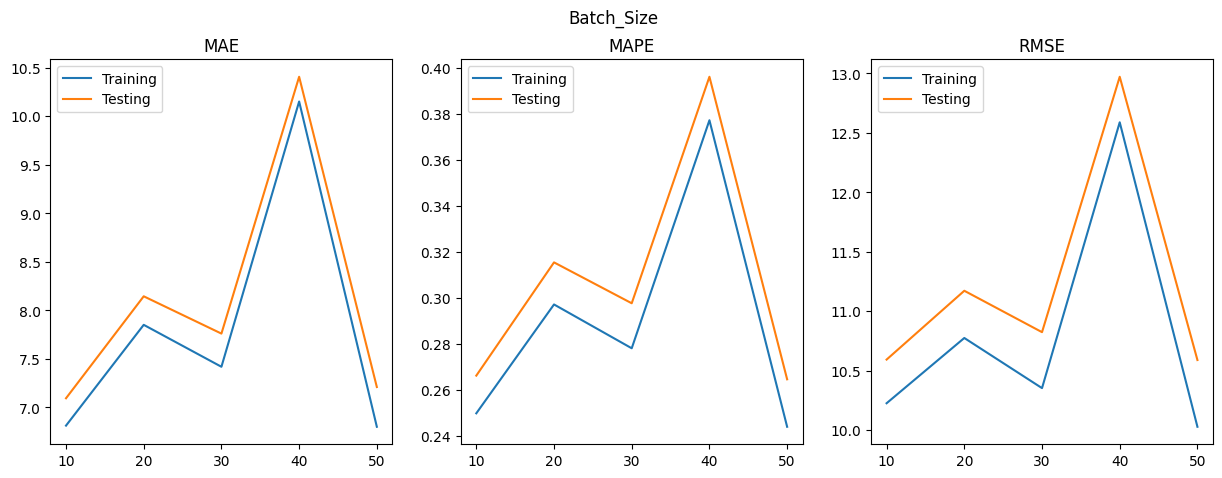

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.plot(bs,mae_TrainingBatch,label="Training")     
plt.plot(bs,mae_TestBatch,label="Testing")    
plt.title("MAE")
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(bs,mape_TrainingBatch,label="Training")     
plt.plot(bs,mape_TestBatch,label="Testing")
plt.title("MAPE")
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(bs,rmse_TrainingBatch,label="Training")     
plt.plot(bs,rmse_TestBatch,label="Testing")
plt.title("RMSE")
plt.legend()
plt.suptitle("Batch_Size")
plt.show()

In [65]:
#實驗:在固定batch_size(10)，固定隱藏層(2)，修改epochs(10~50，step=10)是否對績效有影響
es=[]
for e in range(1,6):
    es.append(e*10)
mae_TrainingEpochs=[]
mape_TrainingEpochs=[]
rmse_TrainingEpochs = []
mae_TestEpochs=[]
mape_TestEpochs=[]
rmse_TestEpochs = []
for e in es:
    model = Sequential()
    model.add(Dense(1000, input_dim=len(trainingX[0]), activation='relu'))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(300, activation='relu'))
    model.add(Dropout(0.2))
    #最後一層的代表有幾類
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    model.fit(trainingX, trainingY, epochs=e, batch_size=10,verbose=0)
    training_pred = model.predict(trainingX,verbose=0)
    predTraining=[]
    for t in training_pred:
        predTraining.append(t[0])
    test_pred = model.predict(testingX,verbose=0)
    predTest=[]
    for t in test_pred:
        predTest.append(t[0])
    mae_TrainingEpochs.append(mean_absolute_error(trainingY,predTraining))
    mape_TrainingEpochs.append(mean_absolute_percentage_error(trainingY,predTraining))
    rmse_TrainingEpochs.append(sqrt(mean_squared_error(trainingY,predTraining)))
    mae_TestEpochs.append(mean_absolute_error(testingY,predTest))
    mape_TestEpochs.append(mean_absolute_percentage_error(testingY,predTest))
    rmse_TestEpochs.append(sqrt(mean_squared_error(testingY,predTest)))

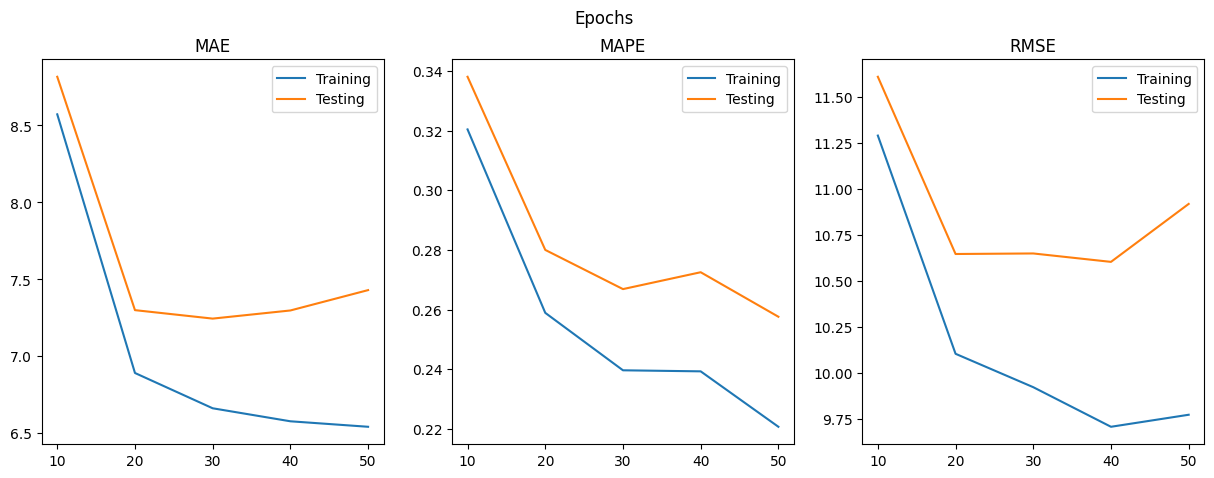

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.plot(es,mae_TrainingEpochs,label="Training")     
plt.plot(es,mae_TestEpochs,label="Testing")    
plt.title("MAE")
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(es,mape_TrainingEpochs,label="Training")     
plt.plot(es,mape_TestEpochs,label="Testing")
plt.title("MAPE")
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(es,rmse_TrainingEpochs,label="Training")     
plt.plot(es,rmse_TestEpochs,label="Testing")
plt.title("RMSE")
plt.legend()
plt.suptitle("Epochs")
plt.show()

In [67]:
#實驗:在固定epoch(10)，固定batch_size(10)，修改隱藏層(1~5)是否對績效有影響
mae_TrainingHidelayer=[]
mape_TrainingHidelayer=[]
rmse_TrainingHidelayer = []
mae_TestHidelayer=[]
mape_TestHidelayer=[]
rmse_TestHidelayer = []
for l in range(1,6):
    model = Sequential()
    for l2 in range(0,l):
        model.add(Dense(600-l2*100, activation='relu'))
    model.add(Dropout(0.2))
    #最後一層的代表有幾類
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
    model.fit(trainingX, trainingY, epochs=e, batch_size=10,verbose=0)
    training_pred = model.predict(trainingX,verbose=0)
    predTraining=[]
    for t in training_pred:
        predTraining.append(t[0])
    test_pred = model.predict(testingX,verbose=0)
    predTest=[]
    for t in test_pred:
        predTest.append(t[0])
    mae_TrainingHidelayer.append(mean_absolute_error(trainingY,predTraining))
    mape_TrainingHidelayer.append(mean_absolute_percentage_error(trainingY,predTraining))
    rmse_TrainingHidelayer.append(sqrt(mean_squared_error(trainingY,predTraining)))
    mae_TestHidelayer.append(mean_absolute_error(testingY,predTest))
    mape_TestHidelayer.append(mean_absolute_percentage_error(testingY,predTest))
    rmse_TestHidelayer.append(sqrt(mean_squared_error(testingY,predTest)))

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.plot(es,mae_TrainingHidelayer,label="Training")     
plt.plot(es,mae_TestHidelayer,label="Testing")    
plt.title("MAE")
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(es,mape_TrainingHidelayer,label="Training")     
plt.plot(es,mape_TestHidelayer,label="Testing")
plt.title("MAPE")
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(es,rmse_TrainingHidelayer,label="Training")     
plt.plot(es,rmse_TestHidelayer,label="Testing")
plt.title("RMSE")
plt.legend()
plt.suptitle("Hide Layer")
plt.show()